<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
np.random.normal(loc=5, scale=2, size=10)

array([ 4.90464756,  7.63527459, -0.23736287,  5.3263807 ,  4.07426674,
        3.65767405,  5.92022449,  3.72789897,  4.86366449,  8.15008159])

### 1.2 Visualising the random numbers

In [3]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Value of random number')

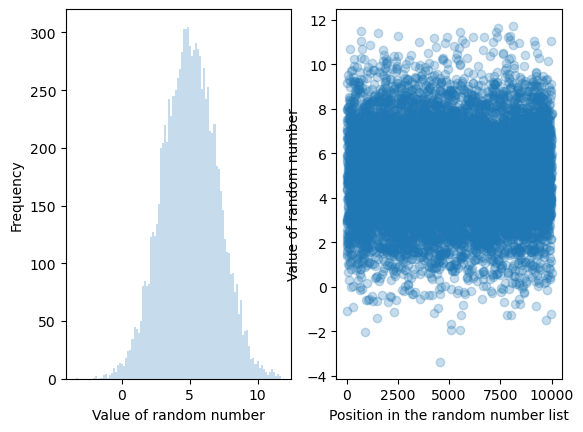

In [4]:
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [5]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.94%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [ ]:

# Your code here


### 1.2 The simulation

In [14]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

In [7]:
import numpy.random as rnd

### 1.3 What does theory say?

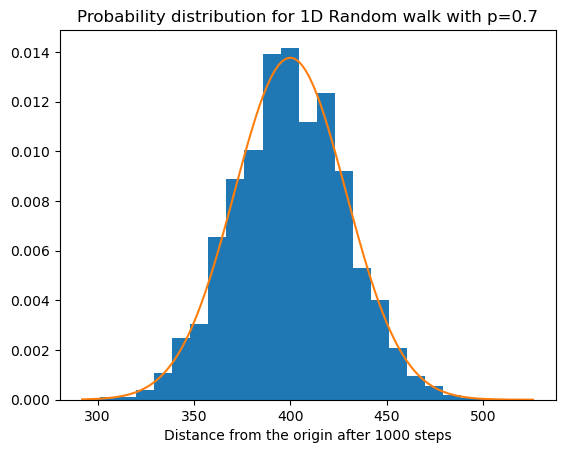

In [18]:
no_of_steps, p = 1_000, .7
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output
prob_right=p
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

In [ ]:

# Your code here


### 2.2 A poor but intuitive solution

In [19]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.14496

### 2.3 A better solution

In [21]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.141708

### 2.4 A smarter solution

In [22]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.139696

## Exercise 1 :  Vital Stats of Random π

In [29]:
def estimate_pi(n):
    N_total=n
    x=rnd.rand(N_total)
    y=rnd.rand(N_total)
    N_green=np.sum((x**2+y**2) <= 1)
    return 4 * (N_green / N_total)

In [36]:
estimate_pi(n=100000)

3.13376

In [41]:
import numpy as np

In [73]:
def piii(r):
    repeats = 100
    return [estimate_pi(r) for _ in range(repeats)]
print(np.mean(piii(1000)))
print(np.std(piii(1000)))

3.1463200000000007
0.05483450008890389


In [80]:
N=[10**x for x in range(1,7)]
print(N)

[10, 100, 1000, 10000, 100000, 1000000]


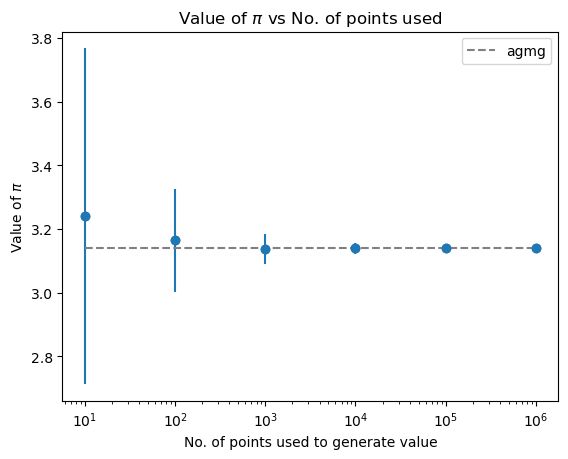

In [94]:
x = [10**m for m in range(1,7)]
y = [np.mean(piii(p)) for p in x]
y_err = [np.std(piii(p)) for p in x]
plt.scatter(x, y)
plt.errorbar(x, y, yerr=y_err,fmt='o',label='stdev of ')
plt.hlines(np.pi, x[0], x[-1], linestyle='--', colors='grey',label='Real $\pi$')
plt.title('Value of $\pi$ vs No. of points used')
plt.xlabel('No. of points used to generate value')
plt.ylabel('Value of $\pi$')
plt.xscale('log')
plt.legend()
plt.show()
